- This Jupyter notebook is dedicated to the reproducibility of the research article, "An automated system for Plasmodium falciparum detection and parasitemia estimation: evaluation on thin blood smear images." It serves as a valuable tool for manipulating datasets and replicating the results and evaluations presented in the article.

# Manaual techniques as a source of variability

## Import the dataset of 14 patients

In [1]:
# Importing the necessary libraries
import pandas as pd  

# Loading the data from a CSV file named '14_patients.csv' with a semicolon (;) delimiter
data = pd.read_csv('14_patients.csv', sep=';')

# Extracting columns corresponding to measurements of three different techniques for each patient
cs = data.loc[:, 'MALARIS1':'MALARIS10']  # Columns for MALARIS
std = data.loc[:, 'STANDARD1':'STANDARD10']  # Columns for STANDARD
miller = data.loc[:, 'MILLER1':'MILLER10']  # Columns for Miller

# Displaying the loaded data
data


,Patient,MALARIS PARs(%),Miller PARs(%),Std PARs(%),MALARIS1,MALARIS2,MALARIS3,MALARIS4,MALARIS5,MALARIS6,...,STANDARD1,STANDARD2,STANDARD3,STANDARD4,STANDARD5,STANDARD6,STANDARD7,STANDARD8,STANDARD9,STANDARD10
0,P1,0.70696,0.937,0.899,0.6256,0.6258,0.6255,0.8126,0.8454,0.6257,...,0.61,1.12,0.91,0.76,0.62,1.16,1.05,0.87,0.87,1.02
1,P2,0.99812,1.028,0.886,0.9550,0.7590,1.2948,0.9740,1.0842,0.7590,...,1.03,0.75,0.52,1.08,0.66,0.56,1.02,1.08,0.96,1.20
2,P3,0.84940,1.358,2.102,0.8522,1.0262,1.0122,0.8522,0.8522,0.8522,...,0.82,1.59,9.65,1.10,1.06,1.60,1.18,1.47,1.25,1.30
3,P4,2.12630,1.613,1.357,2.4754,2.0832,2.2916,2.0832,2.0832,2.6892,...,0.98,1.43,1.81,1.67,1.06,1.24,1.12,1.56,1.64,1.06
4,P5,0.73764,1.706,1.165,0.7272,0.7272,0.7272,0.9090,0.8834,0.8764,...,0.65,0.54,3.75,0.66,1.16,1.23,1.12,0.88,1.04,0.62
5,P6,1.72294,2.353,2.650,1.6974,1.5044,1.7360,1.6124,1.8502,1.7116,...,1.80,2.70,1.00,2.70,2.50,5.30,2.80,2.75,2.32,2.68
6,P7,2.77256,2.439,2.954,3.1178,2.2756,2.6494,2.4496,2.6392,2.8114,...,4.30,4.05,2.09,3.23,2.50,2.88,1.97,3.04,3.07,2.41
7,P8,2.85316,3.627,3.441,2.5526,2.8360,2.6214,2.8576,2.1788,2.0010,...,1.30,4.17,4.58,4.90,2.50,3.75,3.08,4.10,2.41,3.62
8,P9,4.88750,3.992,3.814,4.5722,5.7956,4.4334,4.9936,4.4412,5.3256,...,4.03,4.37,3.99,5.70,3.04,3.22,3.12,2.89,3.22,4.56
9,P10,5.03380,4.924,4.868,4.9964,5.2770,5.1308,5.3538,5.0460,5.4864,...,7.40,4.80,3.00,4.08,5.90,5.50,5.50,4.10,4.00,4.40


## Relative Standard Deviation (RSD) calculation

In [9]:
# Calculating Relative Standard Deviation (RSD) for different techniques

# Combine the RSD values for each technique (MALARIS, Miller Reticle, STANDARD)
bb = pd.concat([
    (cs.std(axis=1) / cs.mean(axis=1)) * 100,
    (miller.std(axis=1) / miller.mean(axis=1)) * 100,
    (std.std(axis=1) / std.mean(axis=1)) * 100
], axis=1).drop_duplicates(keep=False)

# Assigning column names for better clarity
cols = ['Malaris', 'Miller Reticle', 'Standard Measurement']
bb.columns = cols

# Calculating the mean RSD values for each technique
bb_mean = bb.mean()
bb_mean

Malaris                 11.166838
Miller Reticle          26.400527
Standard Measurement    38.226520
dtype: float64

In [10]:
bb

,Malaris,Miller Reticle,Standard Measurement
0,14.936551,26.195272,21.521033
1,20.271850,23.702961,27.333558
2,13.397212,25.060391,126.702999
3,13.383822,38.128748,22.219347
4,17.156595,134.274407,80.893666
5,7.672909,19.178540,40.947258
6,10.196613,7.340613,26.056921
7,19.182338,17.911506,32.393038
8,11.380999,9.359341,23.353961
9,5.662179,11.806322,25.576959


## Comparison of the RSD among the 14 patients, ordered by increasing parasitemia

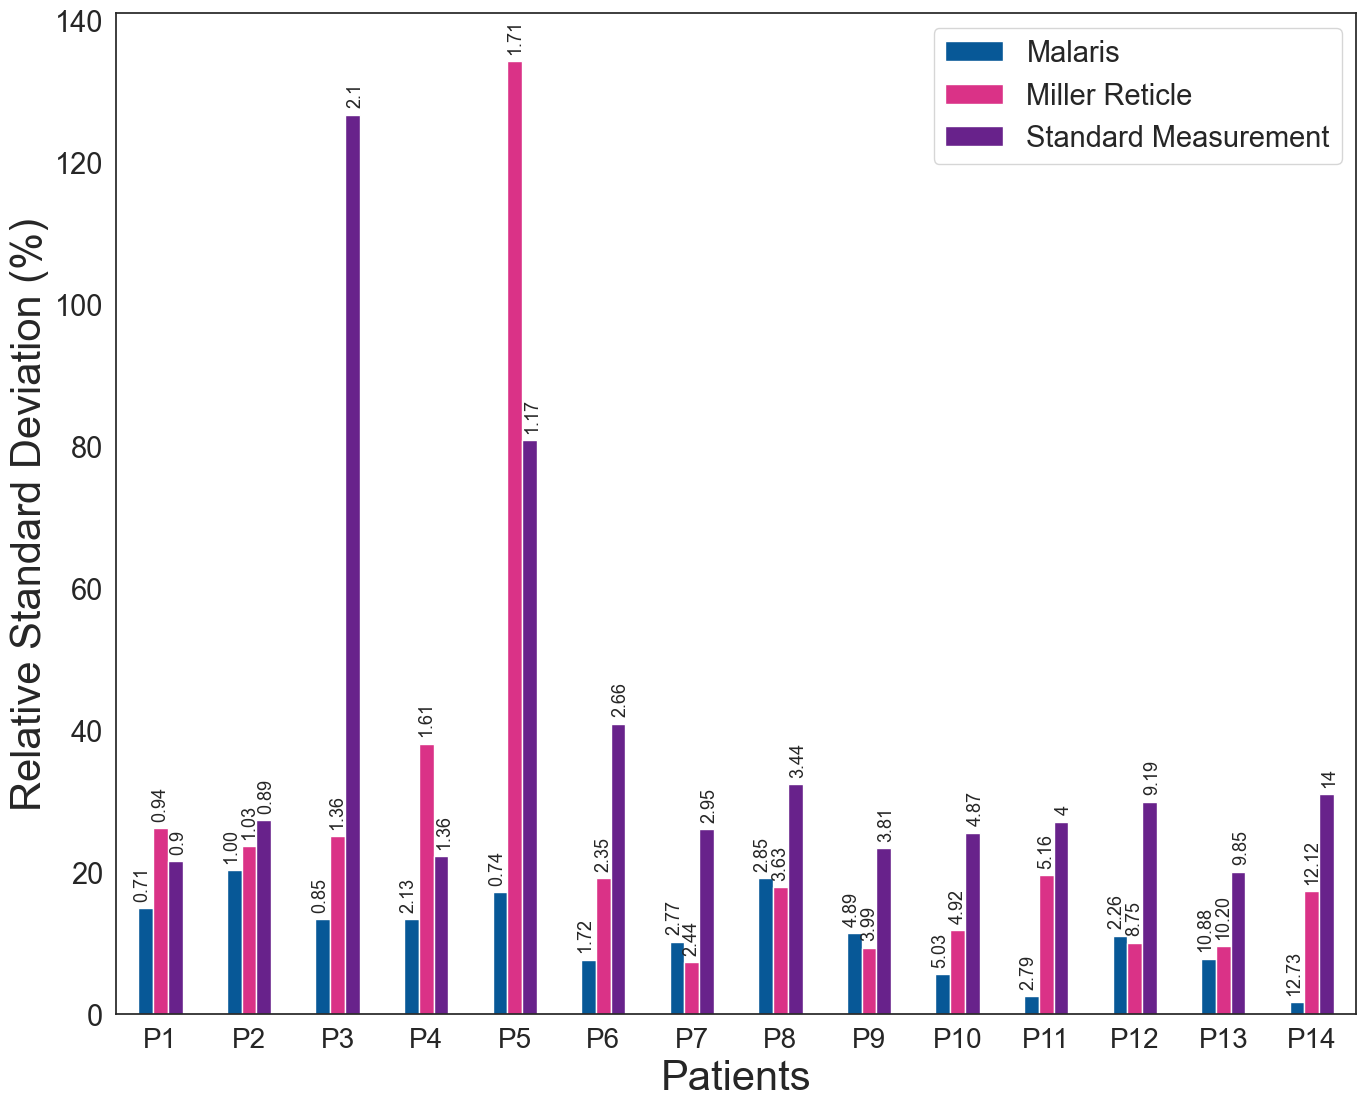

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Defining the range of patients from 0 to 13
patients = range(0, 14)

# Creating a bar plot for Relative Standard Deviation (RSD) with individual patients on the x-axis
# The 'bb' DataFrame contains RSD values for different techniques
bb.plot.bar(rot=0, figsize=(16,13),color=['#075897', '#da3287', '#68228b'],stacked=False) #3 techs

# Customizing the x-axis labels to display patient numbers (P1, P2, ..., P14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],['P1', 'P2', 'P3','P4', 'P5', 'P6', 'P7', 'P8', 'P9','P10', 'P11','P12','P13','P14'])

plt.ylabel('Relative Standard Deviation (%)', horizontalalignment='center',fontsize=30)
plt.xlabel('Patients', horizontalalignment='center',fontsize=30)
#plt.suptitle("(a)",fontsize=30)

# Adding text labels above each bar to display the mean values for each technique (MALARIS, Miller Reticle, STANDARD)
bar_width = 0.50  # Largeur des barres
x_offset = np.arange(len(bb))  # Position des barres

for index, (text1, text2, text3) in enumerate(zip(cs.mean(axis=1), miller.mean(axis=1), np.clip(std.mean(axis=1), None, 14))): #pour 3 techs
    x1 = x_offset[index] - bar_width / 2.5 # Position x du texte 1
    x2 = x_offset[index] # Position x du texte 2
    x3 = x_offset[index] + bar_width / 2.5  # Position x du texte 2
    
    y1=  bb.iloc[index]['Malaris']
    y2 = bb.iloc[index]['Miller Reticle']
    y3 = bb.iloc[index]['Standard Measurement']
    
    plt.text(x1, y1+1, f'{text1:.2f}', ha='center', va='bottom', fontsize=13,rotation=90)
    plt.text(x2, y2+1, f'{text2:.2f}', ha='center', va='bottom', fontsize=13,rotation=90)
    plt.text(x3, y3+1, f'{text3:.2f}'.rstrip('.0'), ha='center', va='bottom', fontsize=13,rotation=90)
    plt.xlabel('Patients', fontsize=30)
    patient_labels = ['P{}'.format(i+1) for i in range(14)]
    plt.xticks(patients, patient_labels,fontsize=20)
#plt.savefig("2techs_14M.jpg",  format="jpg", bbox_inches='tight')


## Boxplots 

(0.0, 50.0)

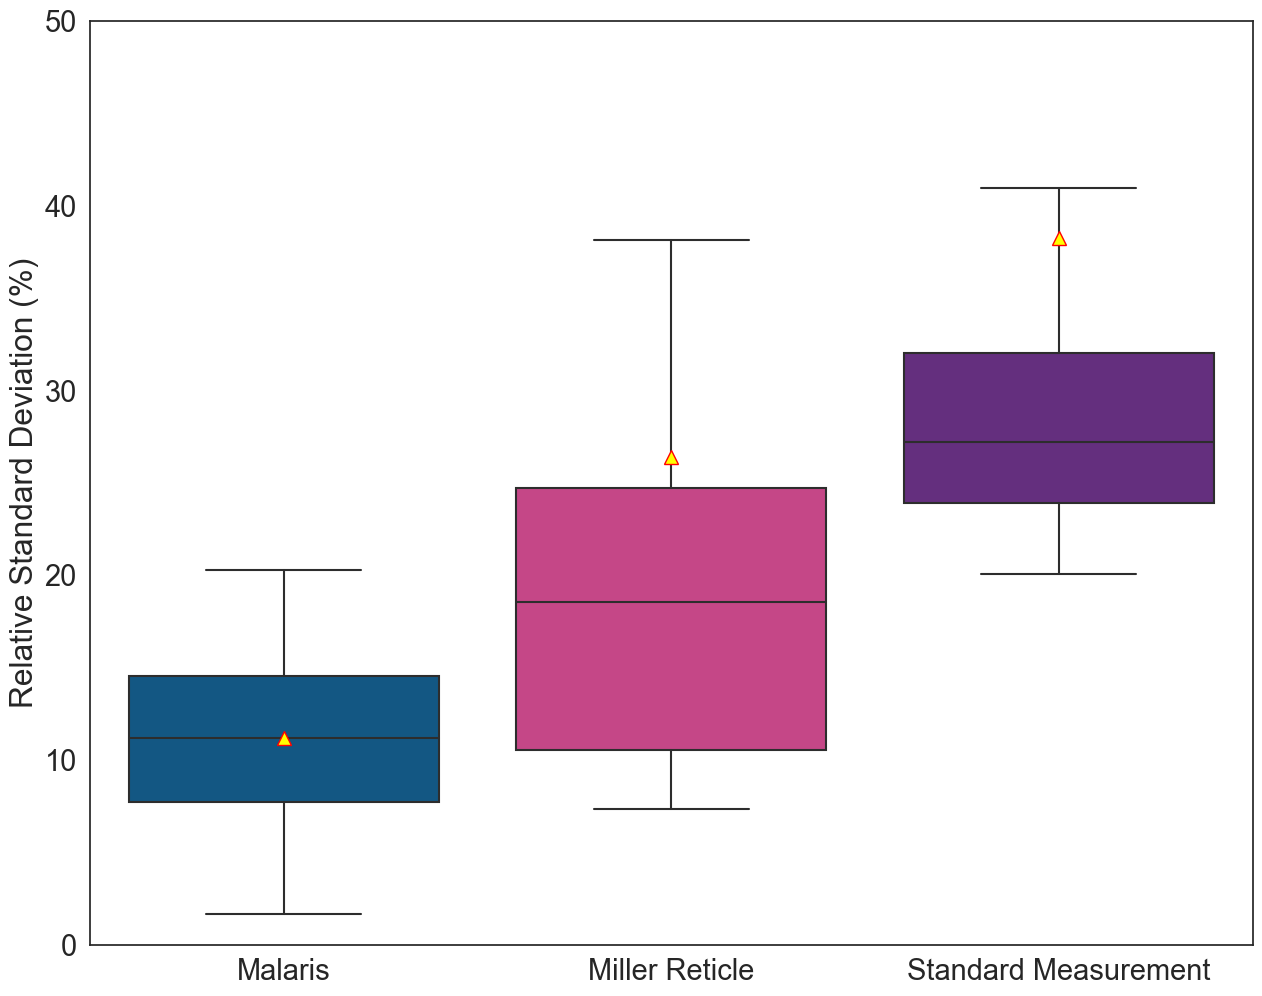

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as st

sn.set(font_scale=1.9, style="white")

my_pal = {'Malaris':"#005b96",
          'Miller Reticle':"#da3287",
          'Standard Measurement':"#68228b"  }



%matplotlib inline
myFig = plt.figure(figsize=(15,12));
sn.boxplot(data=bb,
           showmeans=True, meanprops={
                       "markerfacecolor":"yellow", 
                       "markeredgecolor":"red",
                      "markersize":"10"
           },
          palette=my_pal).set(ylabel='Relative Standard Deviation (%)',xlabel=None)

#plt.axhline(y=10, color='r',linestyle='--',lw = 3)
plt.ylim(0,50)
#plt.savefig("3techs_14_patients_RSD.jpg",  format="jpg", bbox_inches='tight')



## Confidence intervals 

In [16]:
import numpy as np
import scipy.stats as stats

# Reshaping the data arrays to have 14 patients with 10 data points each
cs_reshaped = np.array(cs).reshape((14, 10))
miller_reshaped = np.array(miller).reshape((14, 10))
std_reshaped = np.array(std).reshape((14, 10))

# Calculating Confidence Intervals (CI) for MALARIS technique for each patient
confidence_intervals1 = []
for patient_data in cs_reshaped:
    mean = np.mean(patient_data)
    std_err = stats.sem(patient_data)
    interval = std_err * stats.t.ppf((1 + 0.95) / 2., len(patient_data) - 1)
    confidence_intervals1.append((mean - interval, mean + interval))


# Calculating Confidence Intervals (CI) for Miller Reticle technique for each patient
confidence_intervals2 = []
for patient_data in miller_reshaped:
    mean = np.mean(patient_data)
    std_err = stats.sem(patient_data)
    interval = std_err * stats.t.ppf((1 + 0.95) / 2., len(patient_data) - 1)
    confidence_intervals2.append((mean - interval, mean + interval))



# Calculating Confidence Intervals (CI) for Standard Measurement technique for each patient
confidence_intervals3 = []
for patient_data in std_reshaped:
    mean = np.mean(patient_data)
    std_err = stats.sem(patient_data)
    interval = std_err * stats.t.ppf((1 + 0.95) / 2., len(patient_data) - 1)
    confidence_intervals3.append((mean - interval, mean + interval))


### Plots

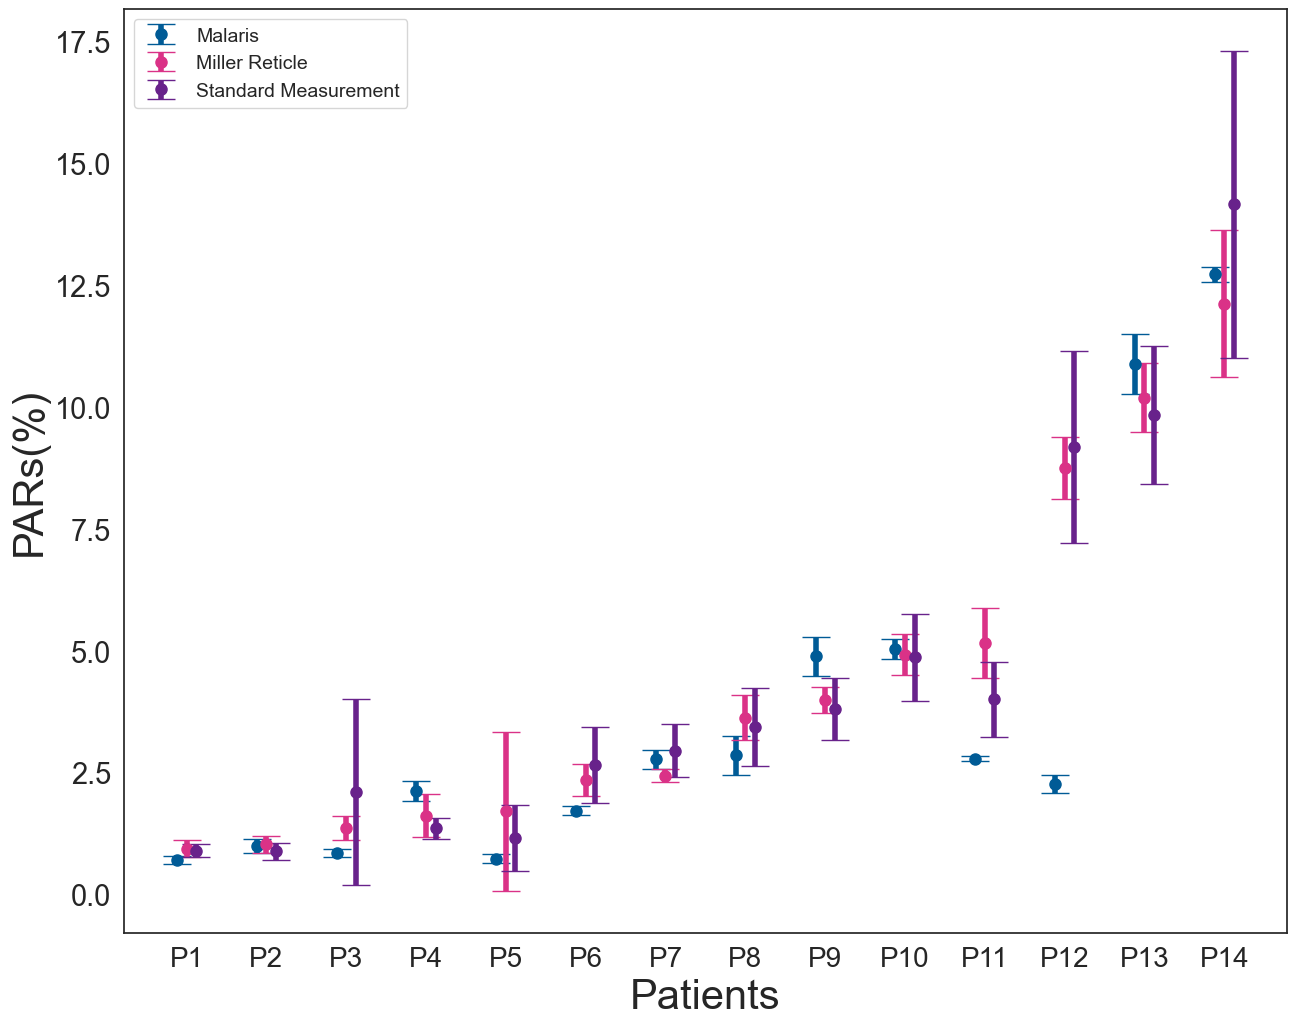

In [15]:
import matplotlib.pyplot as plt

patients = range(1, 15)
my_pal = {'Malaris':"#005b96",
          'Miller Reticle':"#da3287",
          'Standard Measurement':"#68228b"  }
# Les moyennes sont simplement les moyennes de chaque intervalle de confiance
means = [(ci[0] + ci[1]) / 2 for ci in confidence_intervals1]

# Les erreurs sont la différence entre la moyenne et chaque limite de l'intervalle de confiance
errors = [(ci[1] - ci[0]) / 2 for ci in confidence_intervals1]

# Calculer les moyennes et les erreurs pour la deuxième technique
means2 = [(ci[0] + ci[1]) / 2 for ci in confidence_intervals2]
errors2 = [(ci[1] - ci[0]) / 2 for ci in confidence_intervals2]

# Calculer les moyennes et les erreurs pour la troisième technique
means3 = [(ci[0] + ci[1]) / 2 for ci in confidence_intervals3]
errors3 = [(ci[1] - ci[0]) / 2 for ci in confidence_intervals3]

width = 0.12

plt.figure(figsize=(15,12));
# Tracer les moyennes avec les intervalles de confiance pour la première technique
plt.errorbar(np.array(patients) - width, means, yerr=errors, fmt='o', label='Malaris', capsize=10,color= '#005b96',elinewidth=4,markersize=8)

# Tracer les moyennes avec les intervalles de confiance pour la deuxième technique
plt.errorbar(np.array(patients), means2, yerr=errors2, fmt='o', label='Miller Reticle',capsize=10,color= '#da3287',elinewidth=4,markersize=8)

# Tracer les moyennes avec les intervalles de confiance pour la troisième technique
plt.errorbar(np.array(patients)+width, means3, yerr=errors3, fmt='o', label='Standard Measurement',capsize=10,color= '#68228b',elinewidth=4,markersize=8)

# Afficher la légende avec une taille de police plus grande
plt.legend(fontsize=14)
#plt.suptitle("(b)",fontsize=30)

# Titres des axes et du graphique avec une taille de police plus grande
#plt.title('Intervalles de confiance pour les différentes techniques', fontsize=20)
plt.xlabel('Patients', fontsize=30)
plt.ylabel('PARs(%)', fontsize=30)
# Agrandir les chiffres des axes
#plt.tick_params(axis='both', labelsize=20)
# Définir les labels de l'axe des x
patient_labels = ['P{}'.format(i+1) for i in range(14)]
plt.xticks(patients, patient_labels,fontsize=20)
#plt.savefig("ICx3.jpg",  format="jpg", bbox_inches='tight')
plt.show()


# Parasitemia repeatability using MALARIS : the impact of the number of fields

## Pairs of combinations calculation

In [18]:
from itertools import combinations
import pandas as pd
import numpy as np

# A function for checking the sanity of pairs
def sanity_check(l):
    all_pairs = set()
    # check that the elements are distinct between sets of the pair
    for s1, s2 in l:
        if len(set(s1) & set(s2)):
            return False
        # check that there is no redundant pairs
        if str(set(s1)) + str(set(s2)) in all_pairs:
            return False
        all_pairs.add(str(set(s1)) + str(set(s2)))
    
    return True

# A function to generate all possible pairs of sets of a given size (k)
def all_set_pairs(l, k,elements):
    indices = np.arange(len(elements))
    for comb1 in combinations(indices, k):
        assert max(comb1) == comb1[-1]
        comb1 = list(comb1)
        set1 = elements[comb1]
        remaining_elements = [i for i in set(indices) - set(comb1) if i > min(comb1)]
        for comb2 in combinations(remaining_elements, k):
            comb2 = list(comb2)
            set2 = elements[comb2]
            yield list(set1), list(set2)

In [19]:
out = []  # Initialize an empty list to store the output combinations

# Iterate over different sizes (k) for the combinations
for k in range(1, 6):
    # Generate all pairs of sets (s1, s2) of size k from the input data (cs.values) and column names (cs.columns)
    for s1, s2 in all_set_pairs(cs.values, k, cs.columns):        
        # Append the combinations to the 'out' list as tuples
        out.append((k, np.array(s1), np.array(s2)))

# Create a DataFrame from the 'out' list with appropriate column names
df = pd.DataFrame(data=out, columns=['k', 'combinations 1', 'combinations 2'])
df  # Display the resulting DataFrame

,k,combinations 1,combinations 2
0,1,[MALARIS1],[MALARIS2]
1,1,[MALARIS1],[MALARIS3]
2,1,[MALARIS1],[MALARIS4]
3,1,[MALARIS1],[MALARIS5]
4,1,[MALARIS1],[MALARIS6]
...,...,...,...
4471,5,"[MALARIS1, MALARIS6, MALARIS7, MALARIS8, MALAR...","[MALARIS2, MALARIS3, MALARIS4, MALARIS5, MALAR..."
4472,5,"[MALARIS1, MALARIS6, MALARIS7, MALARIS8, MALAR...","[MALARIS2, MALARIS3, MALARIS4, MALARIS5, MALAR..."
4473,5,"[MALARIS1, MALARIS6, MALARIS7, MALARIS9, MALAR...","[MALARIS2, MALARIS3, MALARIS4, MALARIS5, MALAR..."
4474,5,"[MALARIS1, MALARIS6, MALARIS8, MALARIS9, MALAR...","[MALARIS2, MALARIS3, MALARIS4, MALARIS5, MALAR..."


##  Means of parasitemia measurements per combination

In [20]:
from math import sqrt  # Importing the square root function from the math module

# Initialize two empty lists to store the means of rows and fields for combinations 1 and 2
means_rows_fields1 = []
means_rows_fields2 = []

# Iterate through the rows of the DataFrame 'df'
for index, row in df.iterrows():
    # Calculate the means of rows and fields for 'combinations 1' and append to 'means_rows_fields1'
    means_rows_fields1.append(cs.loc[:, row['combinations 1']].mean(axis=1))
    
    # Calculate the means of rows and fields for 'combinations 2' and append to 'means_rows_fields2'

    means_rows_fields2.append(cs.loc[:, row['combinations 2']].mean(axis=1))

# Create DataFrames 'means_rows_fields1' and 'means_rows_fields2' from the generated lists
means_rows_fields1 = pd.DataFrame(means_rows_fields1)
means_rows_fields2 = pd.DataFrame(means_rows_fields2)

# Define column names for the DataFrames based on patient labels
cols = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14']
means_rows_fields1.columns = cols
means_rows_fields2.columns = cols


## Computing the Relative Standard Error (RSE) between pairs 

In [21]:
from sklearn import metrics  # Import metrics module from scikit-learn
rse_malaris = []  # Initialize an empty list to store the relative standard errors (RSE)

# Iterate through pairs of rows from 'means_rows_fields1' and 'means_rows_fields2'
for row1, row2 in zip(means_rows_fields1.iterrows(), means_rows_fields2.iterrows()):
    # Calculate the mean squared error (MSE) between the two rows and then take the square root
    # to compute the relative standard error (RSE) as a percentage, and append to 'rse_malaris'
    rse_malaris.append(np.sqrt(metrics.mean_squared_error(row1[1], row2[1]) * 100))


In [22]:
rse_malaris = pd.DataFrame(rse_malaris)  # Create a DataFrame from the 'rse_malaris' list
rse_malaris['K'] = df['k'].values  # Add a new column 'K' to the DataFrame with values from the 'k' column of DataFrame 'df'
rse_malaris = rse_malaris.rename(columns={0: 'RSE'})  # Rename the column with index 0 to 'RSE' in the DataFrame
rse_malaris  # Display the resulting DataFrame


,RSE,K
0,4.565277,1
1,6.180652,1
2,3.537932,1
3,2.907281,1
4,3.528319,1
...,...,...
4471,1.761732,5
4472,1.654888,5
4473,2.672102,5
4474,1.819160,5


## For k=5


In [95]:
rse_malaris_5=rse_malaris.loc[rse_malaris['K'] == 5]

rse_malaris_5=rse_malaris_5.assign(Name='Malaris')
rse_malaris_5=rse_malaris_5.drop(['K'], axis=1)

rse_malaris_5

,RSE,Name
4350,2.216001,Malaris
4351,2.782025,Malaris
4352,1.774668,Malaris
4353,1.902222,Malaris
4354,1.135395,Malaris
...,...,...
4471,1.761732,Malaris
4472,1.654888,Malaris
4473,2.672102,Malaris
4474,1.819160,Malaris


## Boxplots for k=1 to k=5

RSE    2.017972
dtype: float64


C:\Users\A\AppData\Local\Temp\ipykernel_7156\778279969.py:18: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means_stde=rse_malaris_5.median()


(0.0, 20.0)

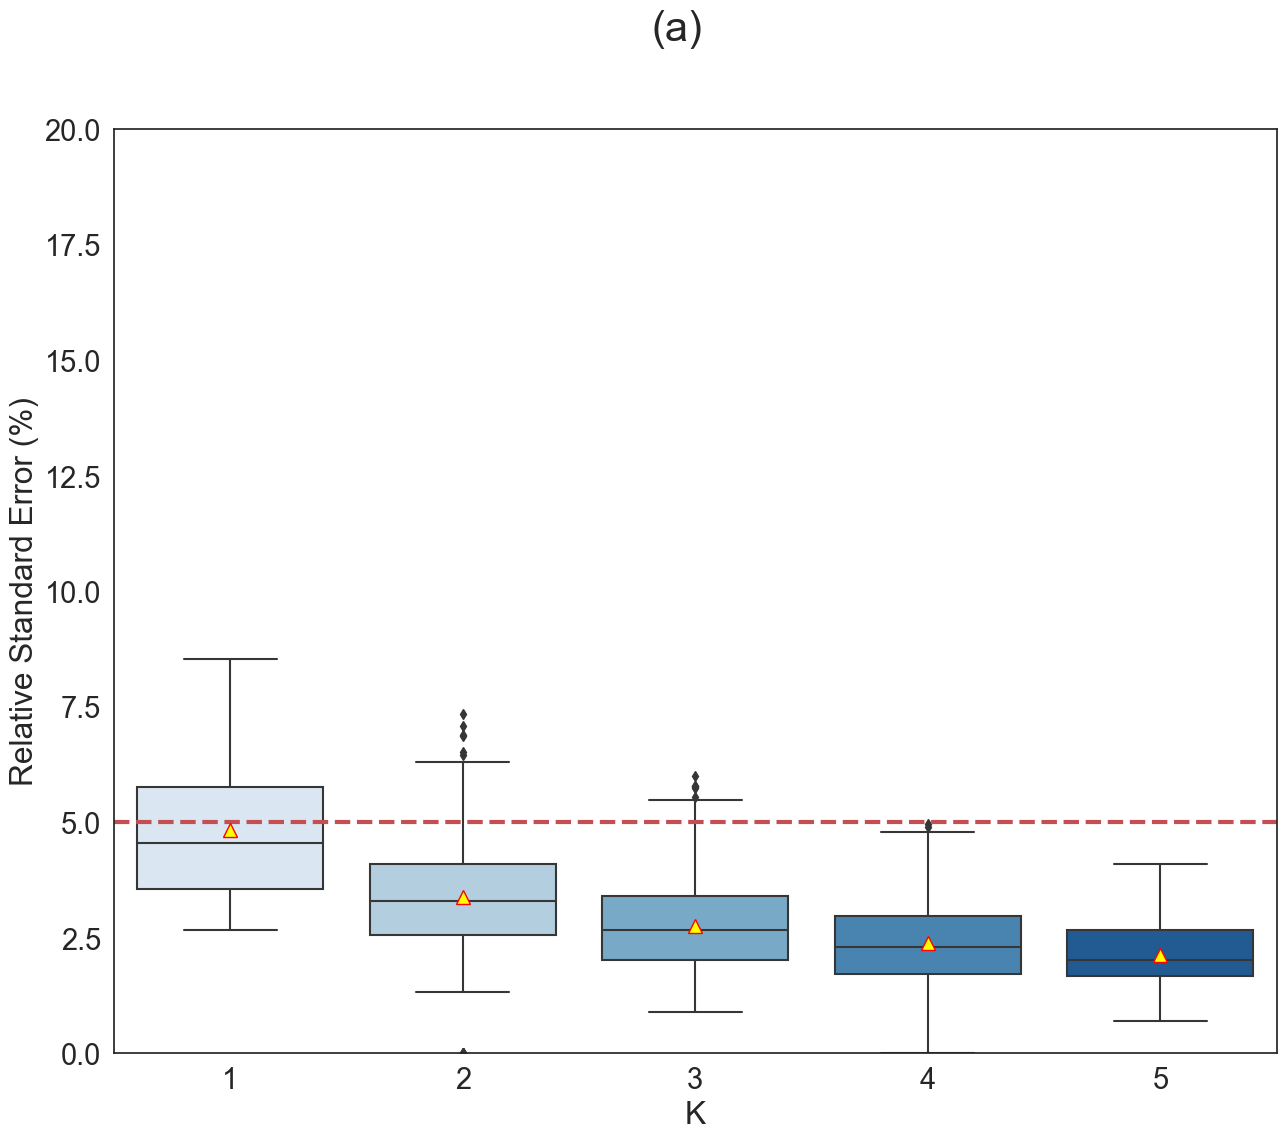

In [98]:

import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as st

sn.set(font_scale=1.9, style="white")

my_pal = {"1 field": "#F9EBEA", 
          "2 fields": "#F2D7D5", 
          "3 fields":"#E6B0AA",
        "4 fields":"#E6B0AA",
         '5 fields':"#CD6155",
        '6 fields':"#C0392B",
         '7 fields':"#A93226",
         '8 fields':"#922B21",
         '9 fields':"#7B241C",
          '10 fields':'#641E16'}

means_stde=rse_malaris_5.median()
print(means_stde)

%matplotlib inline
myFig = plt.figure(figsize=(15,12));
sn.boxplot(data=rse_malaris,x='K',y='RSE',
           showmeans=True, meanprops={
                       "markerfacecolor":"yellow", 
                       "markeredgecolor":"red",
                      "markersize":"10"
           },
          palette="Blues").set(ylabel='Relative Standard Error (%)')
plt.suptitle("(a)",fontsize=30)
plt.axhline(y=5, color='r',linestyle='--',lw = 3)
plt.ylim(0,20)


#myFig.savefig("ste_15.jpg",  format="jpg", bbox_inches='tight')

In [100]:
rse_malaris_5.describe()

,RSE
count,126.000000
mean,2.120663
std,0.778983
min,0.705664
25%,1.666934
50%,2.017972
75%,2.671056
max,4.100629


# RSE between pairs of microscopists

## Miller reticle 

In [23]:
data = []

# Loop for different values of k (number of microscopists in each pair)
for k in range(1, 2):
    # Generate pairs of microscopists
    for s1, s2 in all_set_pairs(miller.values, k, miller.columns):
        # Append the generated pairs to the data list
        data.append((k, np.array(s1), np.array(s2)))

# Create a DataFrame to store the pairs and related information
df = pd.DataFrame(data=data, columns=['k', 'combinations 1', 'combinations 2'])


In [105]:
from math import sqrt

means_rows_fields1=[]
means_rows_fields2=[]
for index, row in df.iterrows():
    means_rows_fields1.append(miller.loc[:,row['combinations 1']].mean(axis=1))
    means_rows_fields2.append(miller.loc[:,row['combinations 2']].mean(axis=1))


In [106]:
means_rows_fields1=pd.DataFrame(means_rows_fields1)
means_rows_fields2=pd.DataFrame(means_rows_fields2)
cols = ['P1', 'P2', 'P3','P4', 'P5','P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14']
means_rows_fields1.columns=cols
means_rows_fields2.columns=cols


In [107]:
from sklearn import metrics
rse_miller=[]
for row1, row2 in zip(means_rows_fields1.iterrows(),means_rows_fields2.iterrows()):
    rse_miller.append(np.sqrt(metrics.mean_squared_error(row1[1], row2[1])*100)) 
    
rse_miller=pd.DataFrame(rse_miller)
#mse['K'] = df['k'].values
rse_miller= rse_miller.rename(columns={0: 'RSE'})

rse_miller=rse_miller.assign(Name='Miller Reticle')



In [108]:
rse_miller.max()


RSE          26.011536
Name    Miller Reticle
dtype: object

## Standard measurement

In [41]:
data = []

for k in range(1, 2):
    for s1, s2 in all_set_pairs(std.values, k, std.columns):        
        data.append((k, np.array(s1), np.array(s2)))
df = pd.DataFrame(data=data, columns=['k', 'combinations 1', 'combinations 2'])

from math import sqrt

means_rows_fields1=[]
means_rows_fields2=[]

for index, row in df.iterrows():
    means_rows_fields1.append(std.loc[:,row['combinations 1']].mean(axis=1))
    means_rows_fields2.append(std.loc[:,row['combinations 2']].mean(axis=1))

In [42]:
means_rows_fields1=pd.DataFrame(means_rows_fields1)
means_rows_fields2=pd.DataFrame(means_rows_fields2)

cols = ['P1', 'P2', 'P3','P4', 'P5','P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14']
means_rows_fields1.columns=cols
means_rows_fields2.columns=cols

In [43]:
from sklearn import metrics
rse_std=[]
for row1, row2 in zip(means_rows_fields1.iterrows(),means_rows_fields2.iterrows()):
    rse_std.append(np.sqrt(metrics.mean_squared_error(row1[1], row2[1])*100)) 
    
rse_std=pd.DataFrame(rse_std)
#mse['K'] = df['k'].values

rse_std= rse_std.rename(columns={0: 'RSE'})

rse_std=rse_std.assign(Name='Standard Measurement')

rse_std

,RSE,Name
0,27.133782,Standard Measurement
1,38.566658,Standard Measurement
2,21.849747,Standard Measurement
3,26.389622,Standard Measurement
4,27.634774,Standard Measurement
5,18.186455,Standard Measurement
6,21.867621,Standard Measurement
7,15.293603,Standard Measurement
8,16.272720,Standard Measurement
9,48.061040,Standard Measurement


## Concatenate the RSE for each technique (including MALARIS for k=5)

In [44]:
bb = pd.concat([rse_malaris_5,rse_miller,rse_std],join='outer')
bb

,RSE,Name
4350,2.216001,Malaris
4351,2.782025,Malaris
4352,1.774668,Malaris
4353,1.902222,Malaris
4354,1.135395,Malaris
...,...,...
40,13.114278,Standard Measurement
41,12.512793,Standard Measurement
42,16.064602,Standard Measurement
43,10.046108,Standard Measurement


## Boxplots

0.7056637179685129 4.100629415450403
6.05581184836989 26.01153590236455
10.046107988384643 48.061040057707565


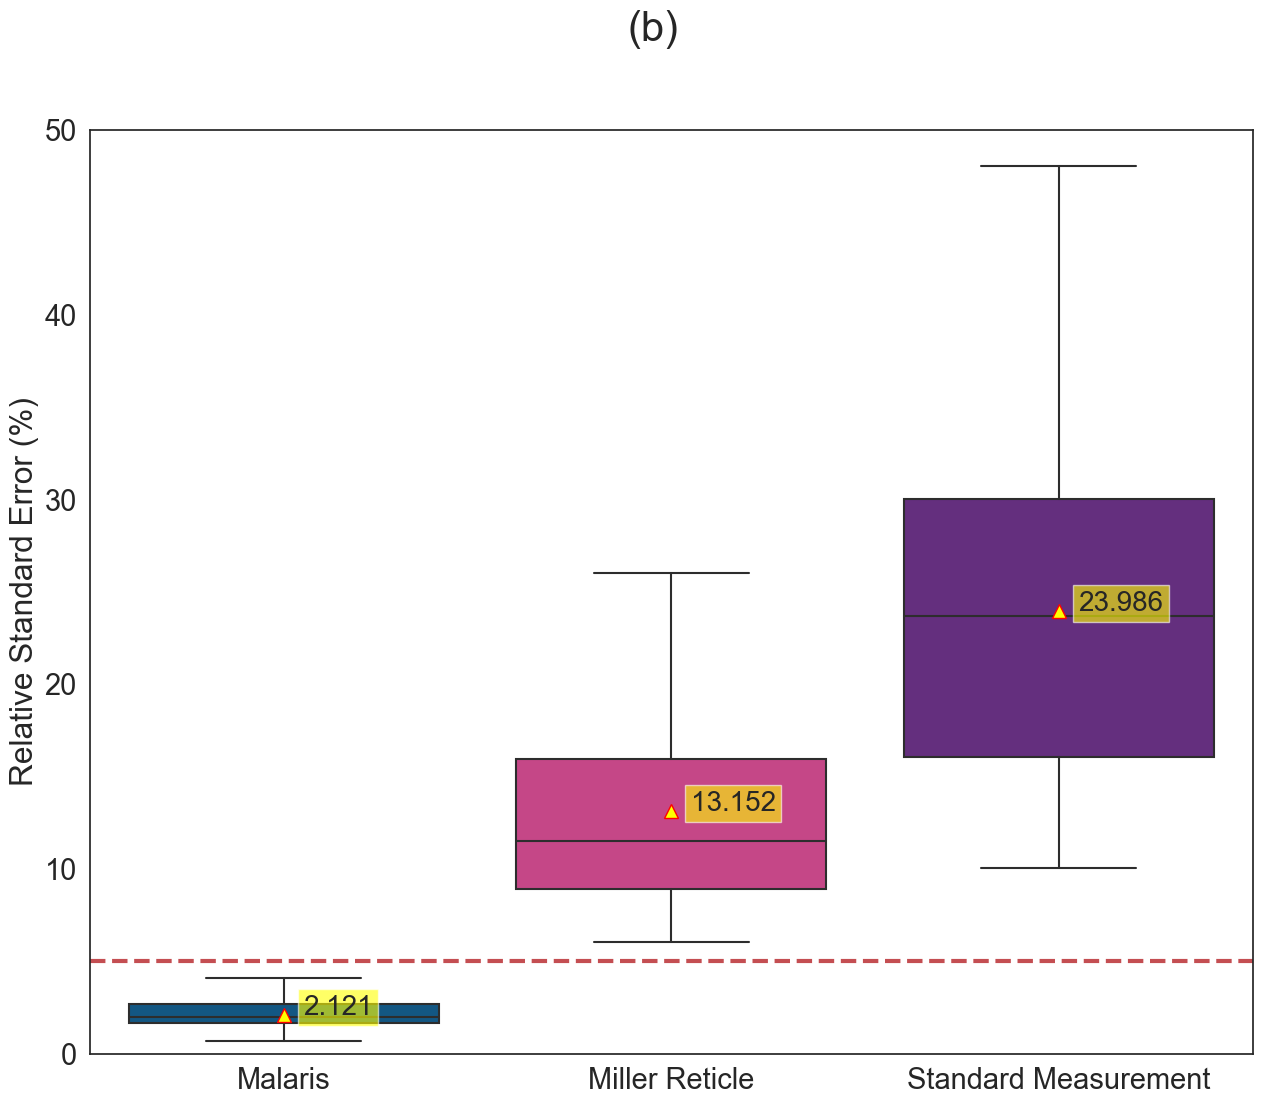

In [53]:

import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as st

sn.set(font_scale=1.9, style="white")

my_pal = {'Malaris':"#005b96",
          'Miller Reticle':"#da3287",
          'Standard Measurement':"#68228b"  }

means_malaris=bb.loc[bb['Name'] == 'Malaris']
means_miller=bb.loc[bb['Name'] == 'Miller Reticle']
means_std=bb.loc[bb['Name'] == 'Standard Measurement']
print(means_malaris.RSE.min(),means_malaris.RSE.max())
print(means_miller.RSE.min(),means_miller.RSE.max())
print(means_std.RSE.min(),means_std.RSE.max())


%matplotlib inline
myFig = plt.figure(figsize=(15,12));
sn.boxplot(data=bb,y='RSE',x='Name',
           showmeans=True, meanprops={
                       "markerfacecolor":"yellow", 
                       "markeredgecolor":"red",
                      "markersize":"10"
           },
          palette=my_pal).set(ylabel='Relative Standard Error (%)',xlabel=None)
plt.suptitle("(b)",fontsize=30)
#plt.axhline(y=20, color='r',linestyle='--')
plt.axhline(y=5, color='r',linestyle='--',lw = 3)
plt.ylim(0,50)

                                                                        
plt.text(0.05, means_malaris.RSE.mean(), str(round(means_malaris.RSE.mean(),3)),
         bbox=dict(facecolor='yellow',
                   alpha=0.6),
        fontsize=20)
plt.text(1.05, means_miller.RSE.mean(), str(round(means_miller.RSE.mean(),3)),
         bbox=dict(facecolor='yellow',
                   alpha=0.6),
        fontsize=20)
plt.text(2.05, means_std.RSE.mean(), str(round(means_std.RSE.mean(),3)),
         bbox=dict(facecolor='yellow',
                   alpha=0.6),
        fontsize=20)

myFig.savefig("ste_15_all.jpg",  format="jpg", bbox_inches='tight')

# MALARIS vs. manual and semiautomatic methods, including Miller reticle and flow cytometry

## Import the dataset of 14 patients


In [69]:
#article
import numpy as np

import pandas as pd 

data=pd.read_csv('102_patients.csv', sep=';')
cs=data.loc[:, 'MALARIS1':'MALARIS10']

data


,Patient,MALARIS PARs(%),Miller PARs(%),Cyto PARs(%),MALARIS1,MALARIS2,MALARIS3,MALARIS4,MALARIS5,MALARIS6,MALARIS7,MALARIS8,MALARIS9,MALARIS10
0,P1,0.0386,0.33,0.20,0.085,0.000,0.000,0.097,0.204,0.000,0.000,0.000,0.000,0.000
1,P2,0.1206,1.80,0.70,0.000,0.238,0.432,0.222,0.000,0.000,0.107,0.103,0.104,0.000
2,P3,0.1730,1.50,1.40,0.078,0.000,0.230,0.345,0.302,0.077,0.146,0.308,0.244,0.000
3,P4,0.3242,0.50,0.40,0.893,0.396,0.284,0.287,0.468,0.182,0.189,0.177,0.178,0.188
4,P5,0.3878,0.30,0.28,0.686,0.104,0.373,0.812,0.166,0.431,0.675,0.094,0.264,0.274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,P98,15.5166,17.00,16.75,17.854,17.025,20.070,15.254,12.085,14.625,15.423,15.779,16.826,10.225
98,P99,16.4490,15.30,11.60,15.480,15.813,13.430,16.667,14.749,17.482,15.527,17.979,20.073,17.291
99,P100,19.6200,20.20,20.20,21.167,17.893,18.094,20.660,20.309,20.239,20.841,20.570,18.682,17.746
100,P101,22.3341,15.70,18.80,24.062,19.668,21.739,21.459,22.713,22.309,22.940,22.005,22.533,23.913


In [57]:
data['MALARIS PARs(%)'].describe()


count    102.000000
mean       4.996996
std        4.844654
min        0.038600
25%        2.092750
50%        3.634900
75%        6.636000
max       27.328000
Name: MALARIS PARs(%), dtype: float64

In [60]:
malaris=np.array(data['MALARIS PARs(%)'])
miller=np.array(data['Miller PARs(%)'])
cyto=np.array(data['Cyto PARs(%)'])

malaris = np.nan_to_num(malaris)
miller = np.nan_to_num(miller)
cyto=np.nan_to_num(cyto)



## Regression plors of parasitemia estimation for MALARIS, Miller Reticle and flow cytometry

<Figure size 2200x2000 with 0 Axes>

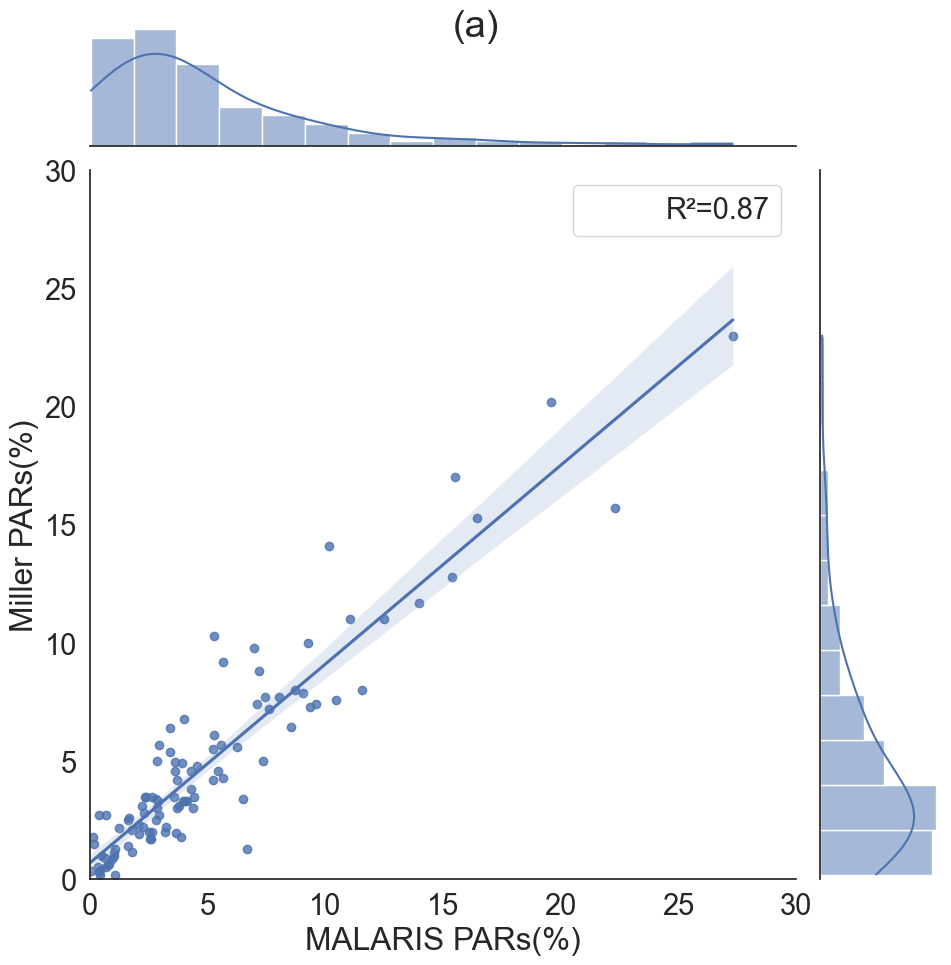

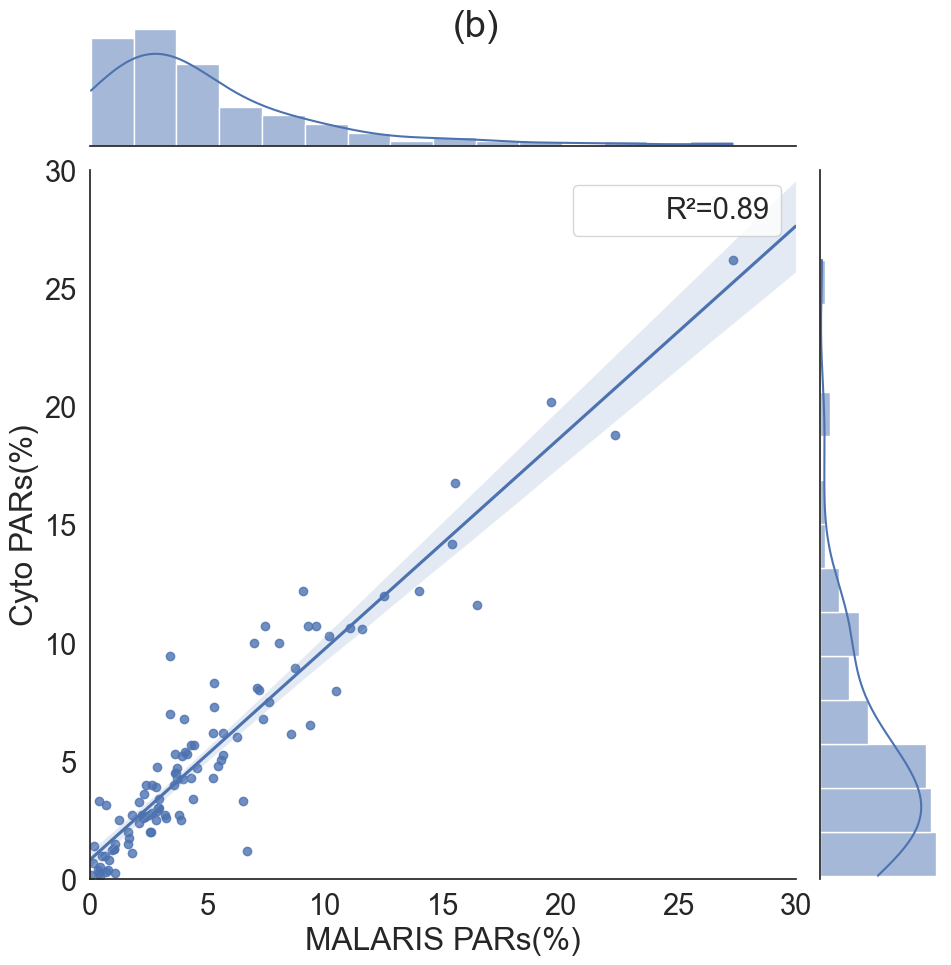

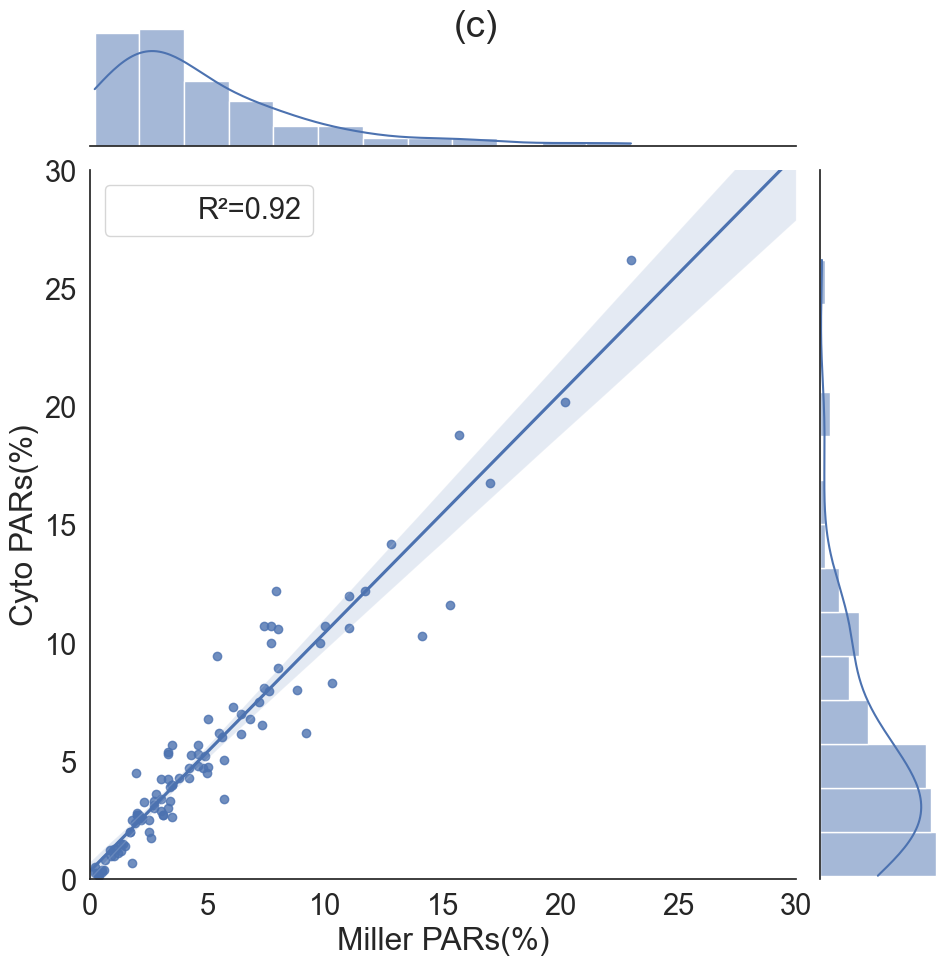

In [64]:
import matplotlib.pyplot as plt
import seaborn as sn 
import scipy.stats as stat


def rsquared(x,y):
    slope, intercept, r_value, p_value, std_err=stat.linregress(x,y)
    return r_value**2

%matplotlib inline
myFig = plt.figure(figsize=(22,20));
sn.set(font_scale=1.9, style="white")

r,p=stat.pearsonr(x=malaris, y=miller)
r=rsquared(malaris,miller)
g=sn.jointplot(x="MALARIS PARs(%)", y="Miller PARs(%)", kind="reg", data=data, 
                  xlim=(0, 30), ylim=(0, 30),
                  color="b", height=10)
phantom,=g.ax_joint.plot([],[],linestyle="",alpha=0)
g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
g.ax_joint.legend([phantom],['R\u00b2={:.2f}'.format(r)])

plt.suptitle("(a)")
#g.savefig("corr1_zoom.jpg",  format="jpg", bbox_inches='tight')

r,p=stat.pearsonr(x=malaris, y=cyto)
r=rsquared(malaris,cyto)
g=sn.jointplot(x="MALARIS PARs(%)", y="Cyto PARs(%)", kind="reg", data=data, truncate=False,
                  xlim=(0, 30), ylim=(0, 30),
                  color="b", height=10)
phantom,=g.ax_joint.plot([],[],linestyle="",alpha=0)
g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
g.ax_joint.legend([phantom],['R\u00b2={:.2f}'.format(r)])
plt.suptitle("(b)")
#g.savefig("corr2_zoom.jpg",  format="jpg", bbox_inches='tight')

r,p=stat.pearsonr(x=miller, y=cyto)
r=rsquared(miller,cyto)
g=sn.jointplot(x="Miller PARs(%)", y="Cyto PARs(%)", kind="reg", data=data, truncate=False,
                  xlim=(0, 30), ylim=(0, 30),
                  color="b", height=10)
phantom,=g.ax_joint.plot([],[],linestyle="",alpha=0)
g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
g.ax_joint.legend([phantom],['R\u00b2={:.2f}'.format(r)])
plt.suptitle("(c)")
plt.show()
#g.savefig("corr3_zoom.jpg",  format="jpg", bbox_inches='tight')

# RSE for 102 patients

In [71]:

data = []

for k in range(1, 6):
    for s1, s2 in all_set_pairs(cs.values, k, cs.columns):        
        #data.append(pd.DataFrame([k, cs[s1].to_string(index=False), cs[s2].to_string(index=False)]))
        data.append((k, np.array(s1), np.array(s2)))
df = pd.DataFrame(data=data, columns=['k', 'combinations 1', 'combinations 2'])
df=df.loc[df['k'] == 5]
df

,k,combinations 1,combinations 2
4350,5,"[MALARIS1, MALARIS2, MALARIS3, MALARIS4, MALAR...","[MALARIS6, MALARIS7, MALARIS8, MALARIS9, MALAR..."
4351,5,"[MALARIS1, MALARIS2, MALARIS3, MALARIS4, MALAR...","[MALARIS5, MALARIS7, MALARIS8, MALARIS9, MALAR..."
4352,5,"[MALARIS1, MALARIS2, MALARIS3, MALARIS4, MALAR...","[MALARIS5, MALARIS6, MALARIS8, MALARIS9, MALAR..."
4353,5,"[MALARIS1, MALARIS2, MALARIS3, MALARIS4, MALAR...","[MALARIS5, MALARIS6, MALARIS7, MALARIS9, MALAR..."
4354,5,"[MALARIS1, MALARIS2, MALARIS3, MALARIS4, MALAR...","[MALARIS5, MALARIS6, MALARIS7, MALARIS8, MALAR..."
...,...,...,...
4471,5,"[MALARIS1, MALARIS6, MALARIS7, MALARIS8, MALAR...","[MALARIS2, MALARIS3, MALARIS4, MALARIS5, MALAR..."
4472,5,"[MALARIS1, MALARIS6, MALARIS7, MALARIS8, MALAR...","[MALARIS2, MALARIS3, MALARIS4, MALARIS5, MALAR..."
4473,5,"[MALARIS1, MALARIS6, MALARIS7, MALARIS9, MALAR...","[MALARIS2, MALARIS3, MALARIS4, MALARIS5, MALAR..."
4474,5,"[MALARIS1, MALARIS6, MALARIS8, MALARIS9, MALAR...","[MALARIS2, MALARIS3, MALARIS4, MALARIS5, MALAR..."


## Pairs of combinations for k=5

In [76]:
from math import sqrt

means_rows_fields1=[]
means_rows_fields2=[]
for index, row in df.iterrows():
    means_rows_fields1.append(cs.loc[:,row['combinations 1']].mean(axis=1))
    means_rows_fields2.append(cs.loc[:,row['combinations 2']].mean(axis=1))
    
means_rows_fields1=pd.DataFrame(means_rows_fields1)
means_rows_fields2=pd.DataFrame(means_rows_fields2)


## RSE

In [77]:
from sklearn import metrics

mse_malaris = []
for col1, col2 in zip(means_rows_fields1.columns, means_rows_fields2.columns):
    mse = np.sqrt(metrics.mean_squared_error(means_rows_fields1[col1], means_rows_fields2[col2]) * 100)
    mse_malaris.append(mse)
    
len(mse_malaris)

102

## Plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


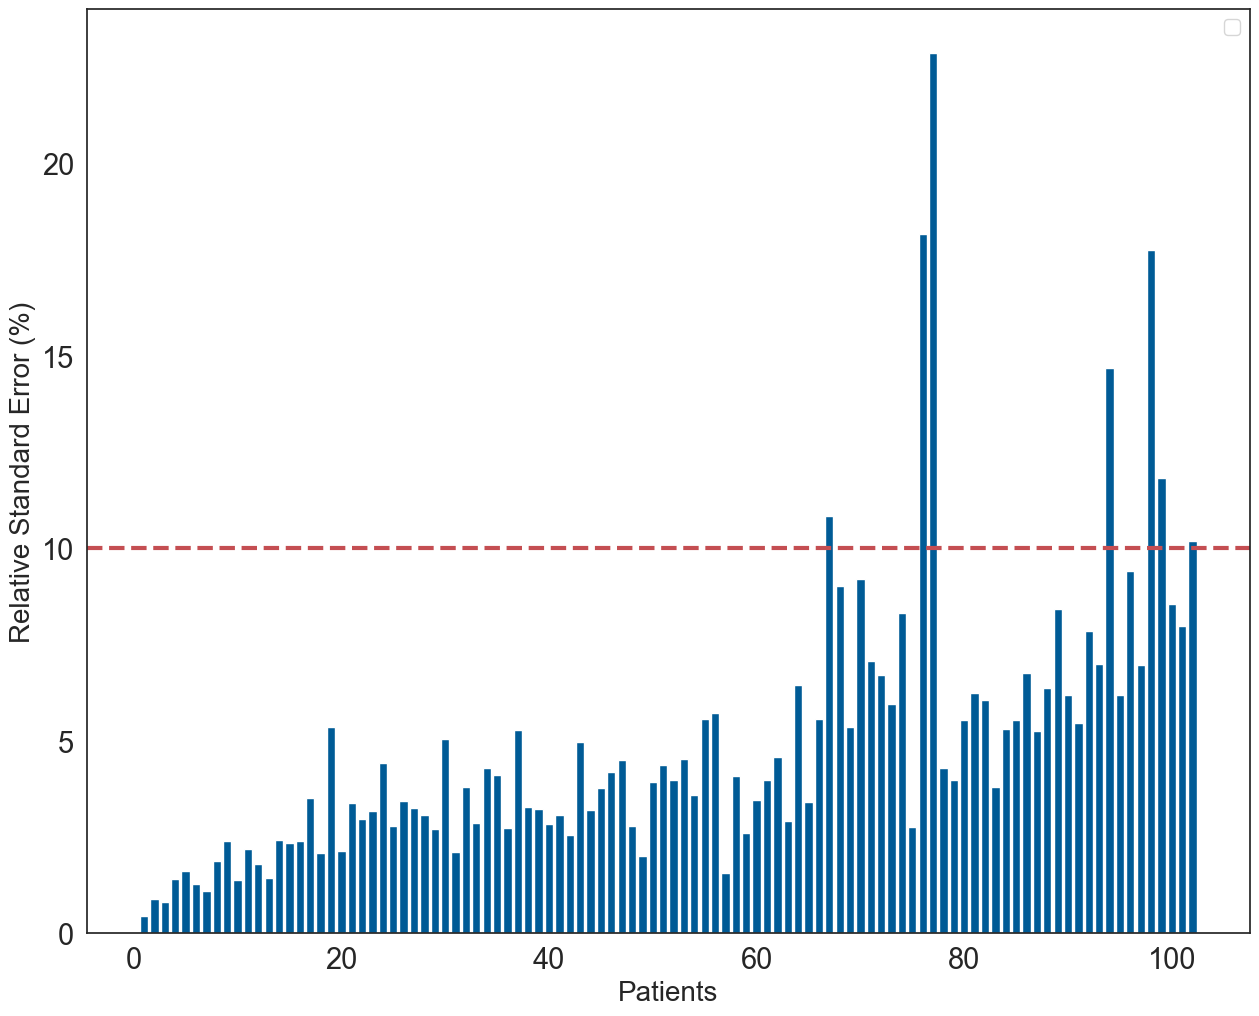

In [78]:
import matplotlib.pyplot as plt

# Créez un vecteur x pour l'axe des x qui correspond au numéro de chaque paire
x = range(1, len(mse_malaris) + 1)

plt.figure(figsize=(15, 12))
plt.bar(x, mse_malaris, color='#005b96')
plt.legend(fontsize=14)
plt.axhline(y=10, color='r',linestyle='--',lw = 3)

# Titres des axes et du graphique avec une taille de police plus grande
#plt.title('Intervalles de confiance pour les différentes techniques', fontsize=20)
plt.xlabel('Patients', fontsize=20)
plt.ylabel('Relative Standard Error (%)', fontsize=20)
# Agrandir les chiffres des axes
#plt.tick_params(axis='both', labelsize=20)
# Définir les labels de l'axe des x
#plt.savefig("patients102.jpg",  format="jpg", bbox_inches='tight')
plt.show()




# Limit of Detection for parasitemia estimations

In [82]:
import pandas as pd

import numpy as np
df=pd.read_csv('102_patients.csv',sep=';')


threshold = 4

# Calculate Sensitivity and Specificity for different LOD values
lod_values = [3.5, 4.0, 4.5, 10]


for lod in lod_values:
    # Calculate True Positive (TP) and False Negative (FN)
    TP = df[(df["MALARIS PARs(%)"] >= lod) & (df["Miller PARs(%)"] >= lod)].shape[0]
    FN = df[(df["MALARIS PARs(%)"] >= lod) & (df["Miller PARs(%)"] < lod)].shape[0]

    # Calculate True Negative (TN) and False Positive (FP)
    TN = df[(df["MALARIS PARs(%)"] < lod) & (df["Miller PARs(%)"] < lod)].shape[0]
    FP = df[(df["MALARIS PARs(%)"] < lod) & (df["Miller PARs(%)"] >= lod)].shape[0]

    # Calculate Sensitivity and Specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    # Print results for each LOD value
    print(f"LOD: {lod:.1f}")
    print(f"Sensitivity: {sensitivity:.3f}")
    print(f"Specificity: {specificity:.3f}")
    print()



LOD: 3.5
Sensitivity: 0.796
Specificity: 0.854

LOD: 4.0
Sensitivity: 0.841
Specificity: 0.862

LOD: 4.5
Sensitivity: 0.892
Specificity: 0.862

LOD: 10.0
Sensitivity: 0.833
Specificity: 0.978



In [83]:
import pandas as pd



threshold = 4

# Calculate Sensitivity and Specificity for different LOD values
lod_values = [3.5, 4.0, 4.5, 10]

for lod in lod_values:
    # Calculate True Positive (TP) and False Negative (FN)
    TP = df[(df["MALARIS PARs(%)"] >= lod) & (df["Cyto PARs(%)"] >= lod)].shape[0]
    FN = df[(df["MALARIS PARs(%)"] >= lod) & (df["Cyto PARs(%)"] < lod)].shape[0]

    # Calculate True Negative (TN) and False Positive (FP)
    TN = df[(df["MALARIS PARs(%)"] < lod) & (df["Cyto PARs(%)"] < lod)].shape[0]
    FP = df[(df["MALARIS PARs(%)"] < lod) & (df["Cyto PARs(%)"] >= lod)].shape[0]

    # Calculate Sensitivity and Specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    # Print results for each LOD value
    print(f"LOD: {lod:.1f}")
    print(f"Sensitivity: {sensitivity:.3f}")
    print(f"Specificity: {specificity:.3f}")
    print()


LOD: 3.5
Sensitivity: 0.907
Specificity: 0.854

LOD: 4.0
Sensitivity: 0.932
Specificity: 0.776

LOD: 4.5
Sensitivity: 0.919
Specificity: 0.800

LOD: 10.0
Sensitivity: 0.917
Specificity: 0.933



In [84]:
import pandas as pd



threshold = 4

# Calculate Sensitivity and Specificity for different LOD values
lod_values = [3.5, 4.0, 4.5, 10]

for lod in lod_values:
    # Calculate True Positive (TP) and False Negative (FN)
    TP = df[(df["Miller PARs(%)"] >= lod) & (df["Cyto PARs(%)"] >= lod)].shape[0]
    FN = df[(df["Miller PARs(%)"] >= lod) & (df["Cyto PARs(%)"] < lod)].shape[0]

    # Calculate True Negative (TN) and False Positive (FP)
    TN = df[(df["Miller PARs(%)"] < lod) & (df["Cyto PARs(%)"] < lod)].shape[0]
    FP = df[(df["Miller PARs(%)"] < lod) & (df["Cyto PARs(%)"] >= lod)].shape[0]

    # Calculate Sensitivity and Specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    # Print results for each LOD value
    print(f"LOD: {lod:.1f}")
    print(f"Sensitivity: {sensitivity:.3f}")
    print(f"Specificity: {specificity:.3f}")
    print()


LOD: 3.5
Sensitivity: 0.960
Specificity: 0.846

LOD: 4.0
Sensitivity: 0.978
Specificity: 0.825

LOD: 4.5
Sensitivity: 0.976
Specificity: 0.900

LOD: 10.0
Sensitivity: 0.917
Specificity: 0.933

